In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
df = pd.read_csv("./heart.csv")

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<AxesSubplot:>

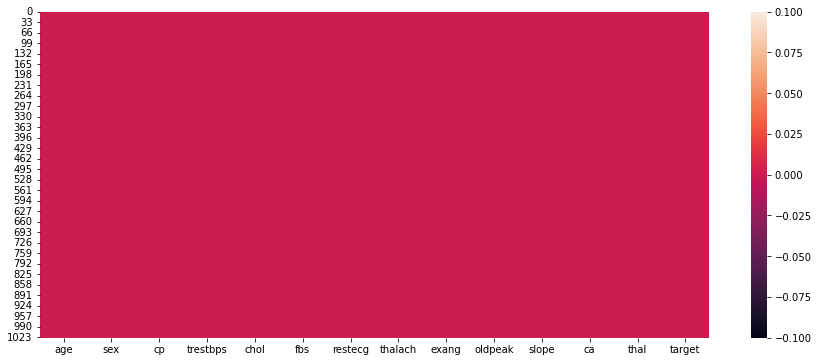

In [6]:
#Check Null Values Present or not
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

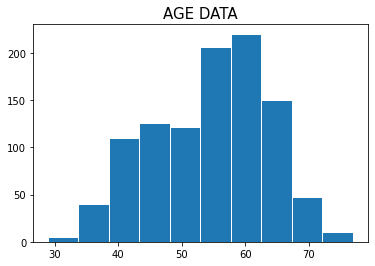

In [8]:
plt.hist(df.age, rwidth=0.98)
plt.title("AGE DATA",fontsize=15)
plt.show()

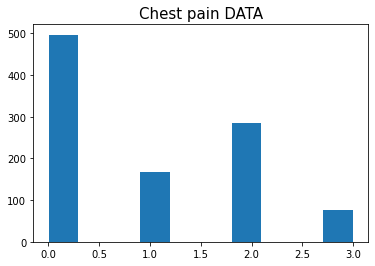

In [9]:
plt.hist(df.cp, rwidth=0.98)
plt.title("Chest pain DATA",fontsize=15)
plt.show()

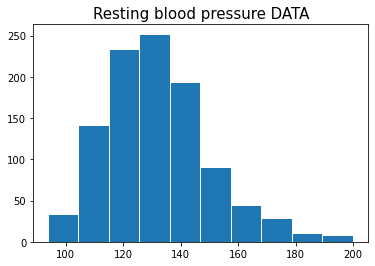

In [10]:
plt.hist(df.trestbps, rwidth=0.98)
plt.title("Resting blood pressure DATA",fontsize=15)
plt.show()

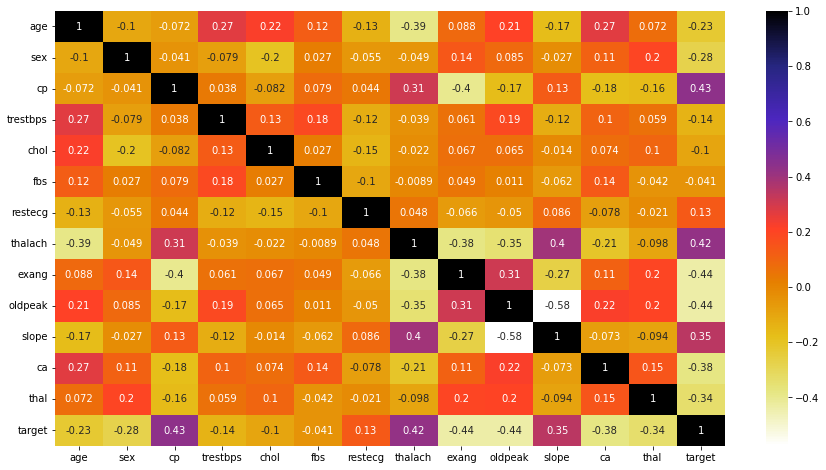

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(df, 0.8)
print(len(set(corr_features)))
print(corr_features)

0
set()


In [14]:
df2 = df.drop(labels=['target'],axis=1)
X = df2.iloc[:, :]
y = df['target'].iloc[:]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,
    y,
    test_size=0.2,
    random_state=20)

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [17]:
model_svm = svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [18]:
# accuracy on training data
X_train_prediction = model_svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [19]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9353658536585366


In [20]:
# accuracy on test data
X_test_prediction = model_svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [21]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9219512195121952


In [22]:
input_data = ([[45,1,3,110,264,0,1,132,0,1.2,1,0,3]])

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_svm.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [26]:
import joblib
joblib.dump(model_svm, "Heart_Prediction.pkl")

['Heart_Prediction.pkl']

In [27]:
model = joblib.load("Heart_Prediction.pkl")

In [28]:
model.predict([[51,1,2,110,175,0,1,123,0,0.6,2,0,2]])[0]

1